In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from transformers import AutoModelForCausalLM, AutoTokenizer

from lexical_reflections.utils.device import DEVICE

model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen2.5-0.5B")
model.to(DEVICE)
model.eval()
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-0.5B")

In [6]:
from lexical_reflections.preprocess_data.flores_plus import load_flores_plus

train_df, test_df = load_flores_plus(["eng_Latn", "rus_Cyrl"], {"eng_Latn": "en", "rus_Cyrl": "ru"}, train_size=50)

test_df = test_df[:100]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

In [7]:
from lexical_reflections.gather_data.hidden_space import collect_hidden_space_by_language

hidden_space_by_language = collect_hidden_space_by_language(model, tokenizer, train_df)

Data len:  50


100%|██████████| 50/50 [00:06<00:00,  7.94it/s]


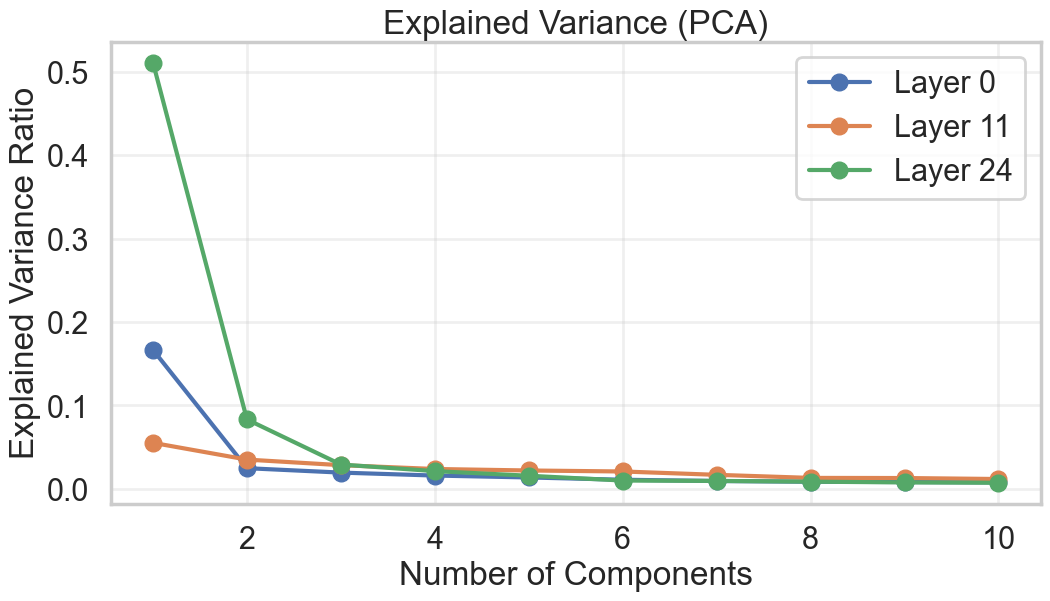

In [8]:
from lexical_reflections.pca.process_hidden_space import extract_pca_components, project_onto_pca
from lexical_reflections.pca.visualize import visualize_explained_variance

pca_components, pca_means, explained_variance_ratios = extract_pca_components(hidden_space_by_language)
projections, _ = project_onto_pca(hidden_space_by_language, pca_components, pca_means)

visualize_explained_variance(pca_components, explained_variance_ratios)

Data len:  100


100%|██████████| 100/100 [00:16<00:00,  5.99it/s]


[en] Average cosine similarity for last layer: 0.5536200404167175
[ru] Average cosine similarity for last layer: 0.6114147305488586


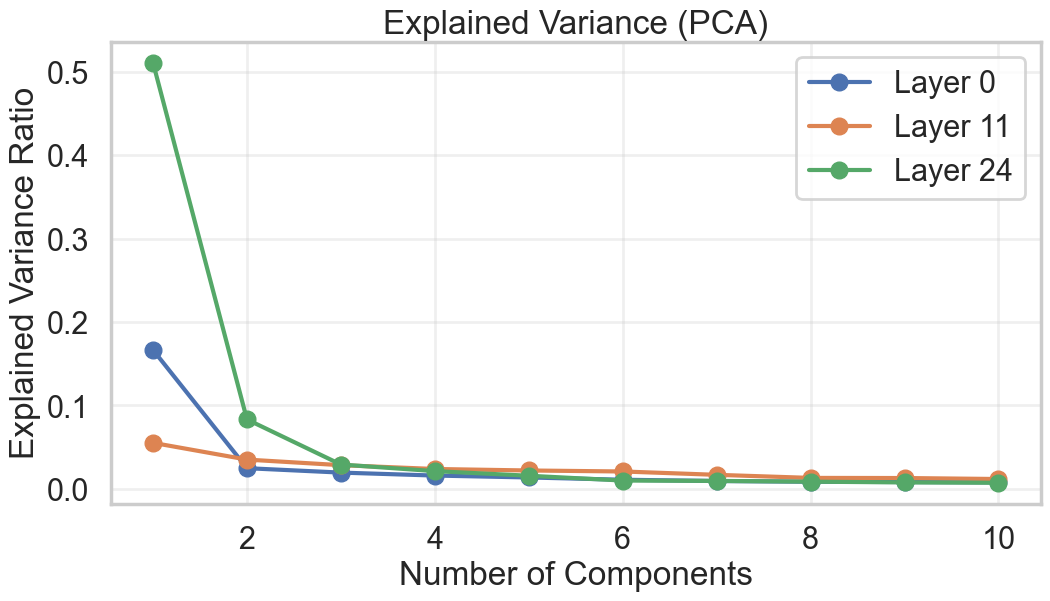

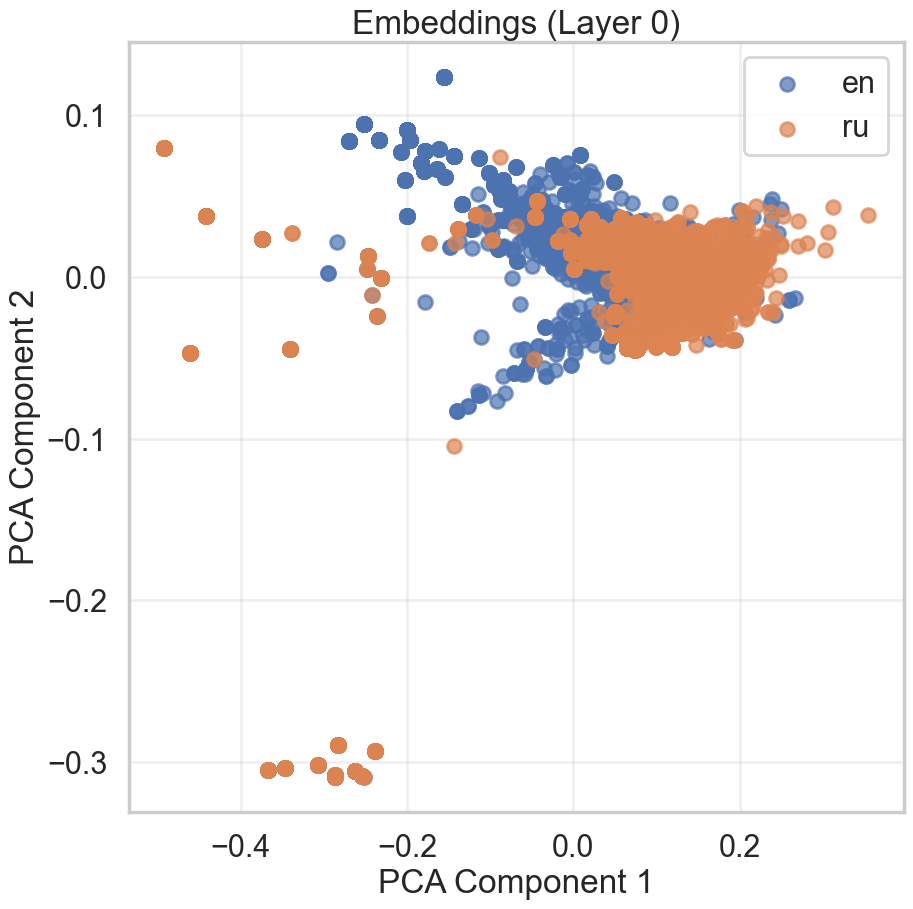

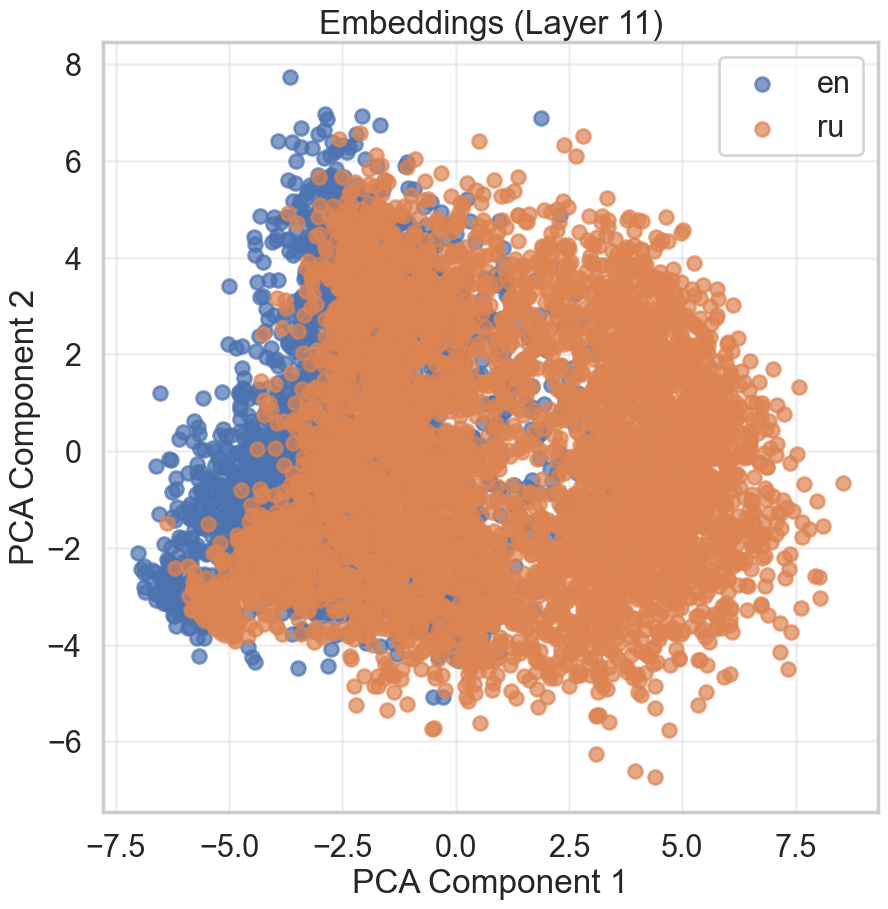

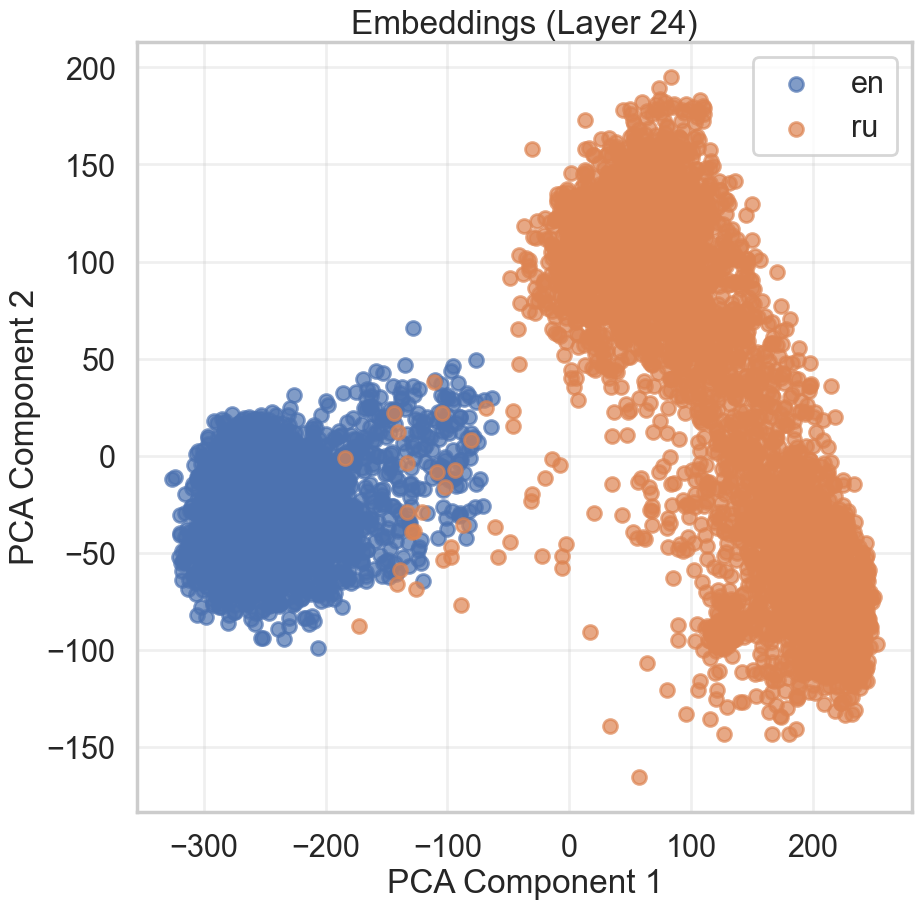

In [9]:
from lexical_reflections.gather_data.hidden_space import collect_hidden_space_by_language
from lexical_reflections.pca.analyze import project_onto_pca
from lexical_reflections.pca.visualize import visualize_explained_variance, visualize_projections

hidden_space_by_language = collect_hidden_space_by_language(model, tokenizer, test_df)

projections, cosine_similarities = project_onto_pca(hidden_space_by_language, pca_components, pca_means)

for k, v in cosine_similarities.items():
    print(f"[{k}] Average cosine similarity for last layer: {v[-1].diagonal().mean()}")

visualize_explained_variance(pca_components, explained_variance_ratios)
visualize_projections(hidden_space_by_language, projections)